In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np

In [2]:
%matplotlib widget

In [3]:
class Cube:
    """
    """
    def __init__(self, colors: dict):
        """
        colors: a dict with 6 entries for 'top', 'bottom', 'front', 'right', 'back', and 'left'
        """
        assert len(colors) == 6
        assert set(colors.keys()) == set(('top', 'bottom', 'front', 'right', 'back', 'left'))
        self._colors = colors
        
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.voxels(np.array([[[1]]]), facecolor=[self.color_of(x) for x in ('bottom', 'top', 'left', 'right', 'front', 'back')], edgecolors='grey');
    
    def change_orientation(self, yaw: int, roll: int, pitch: int):
        assert 0 <= yaw <= 2
        assert 0 <= roll <= 2
        assert 0 <= pitch <= 2
        yaw_trans = {'left': 'front', 'front': 'right', 'right': 'back', 'back': 'left'}
        roll_trans = {'top': 'back', 'back': 'bottom', 'bottom': 'front', 'front': 'top'}
        pitch_trans = {'right': 'top', 'top': 'left', 'left': 'bottom', 'bottom': 'right'}
        for _ in range(yaw):
            self._colors.update({side_after: self._colors[side_before] for side_before, side_after in yaw_trans.items()})
        for _ in range(roll):
            self._colors.update({side_after: self._colors[side_before] for side_before, side_after in roll_trans.items()})
        for _ in range(pitch):
            self._colors.update({side_after: self._colors[side_before] for side_before, side_after in pitch_trans.items()})
            
    def color_of(self, side: str):
        """
        side is one of 'top', 'bottom', 'front', 'right', 'back', and 'left'
        """
        return self._colors[side]
        
    def __str__(self):
        return str(self._colors)

In [4]:
c = Cube({'top': 'yellow',
          'front': 'blue',
          'right': 'green',
          'back': 'cyan',
          'left': 'orange',
          'bottom': 'red'})

In [5]:
print(c)

{'top': 'yellow', 'front': 'blue', 'right': 'green', 'back': 'cyan', 'left': 'orange', 'bottom': 'red'}


In [6]:
c.color_of('back')

'cyan'

In [7]:
#c.change_orientation(1,0,0)

In [8]:
c.color_of('back')

'cyan'

In [9]:
#c.change_orientation(1,1,0)

In [10]:
c.color_of('back')

'cyan'

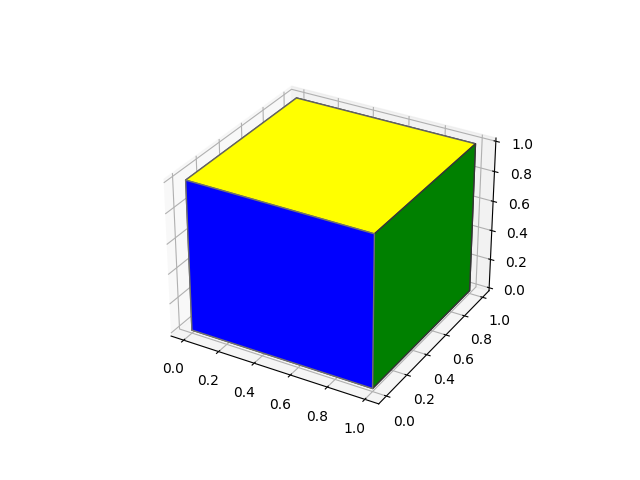

In [11]:
c.plot()

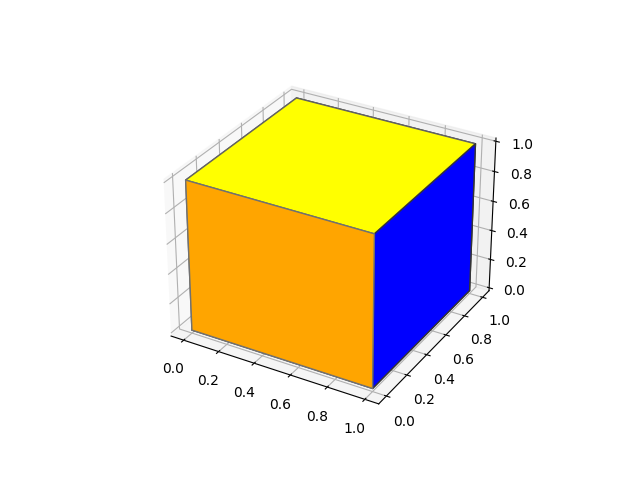

In [12]:
c.change_orientation(1,0,0); c.plot()

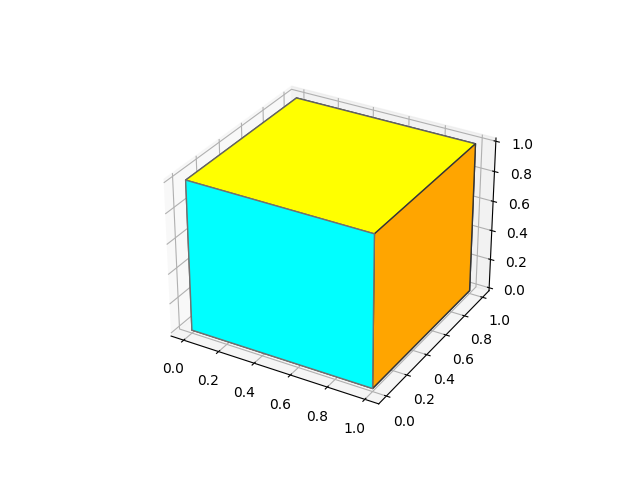

In [13]:
c.change_orientation(1,0,0); c.plot()

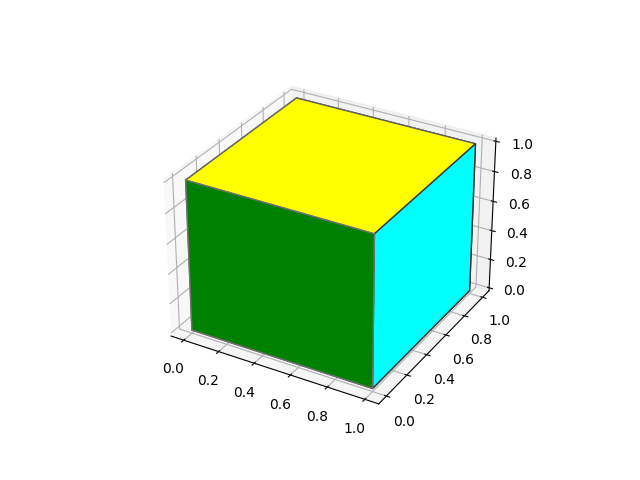

In [14]:
c.change_orientation(1,0,0); c.plot()

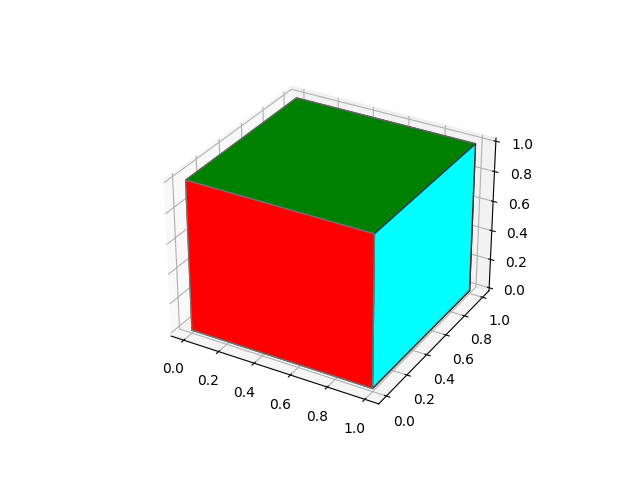

In [15]:
c.change_orientation(0,1,0); c.plot()

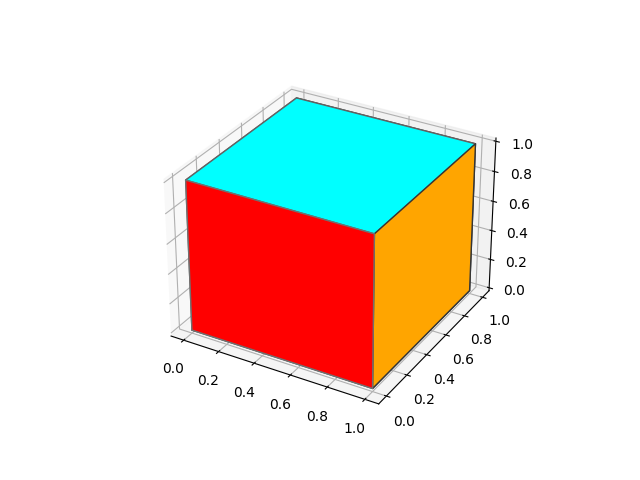

In [16]:
c.change_orientation(0,0,1); c.plot()